MAPS OF THE ANNUAL EMISSIONS FROM FUME

In [10]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,:,:])
lat=np.array(grid_Small.variables['LAT'][0,0,:,:])

In [2]:
# read annual emission file
emissions=netCDF4.Dataset('/data/emisie/EMISIONS_FUME_2015.nc')

# save 2-d fields of annual emissions in the numpy array and dictionary dic_ann 
dic_ann={}
for i in emissions.variables.keys():
    if i !='TFLAG' and i!='PNO3':
       dic_ann[i]=np.array(emissions.variables[i][0,0,:,:]) 

PLOT THE ANNUAL EMISSION MAPS

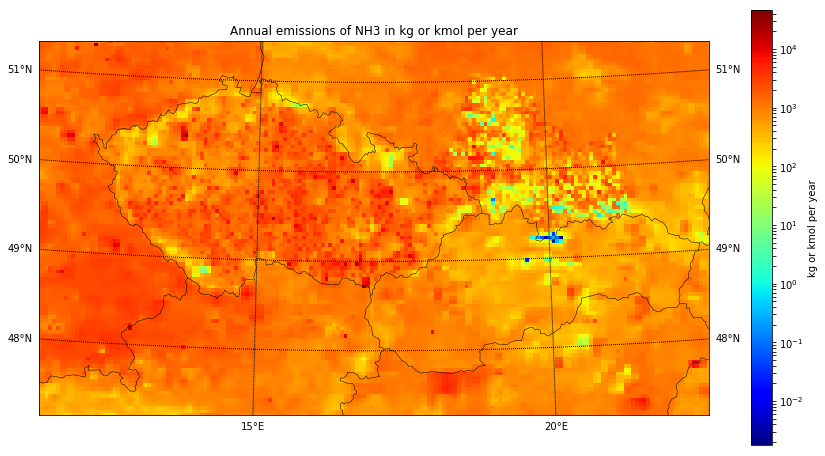

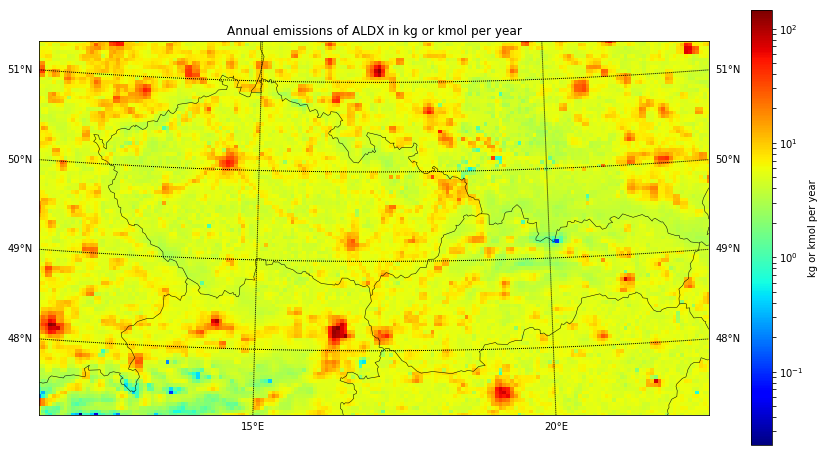

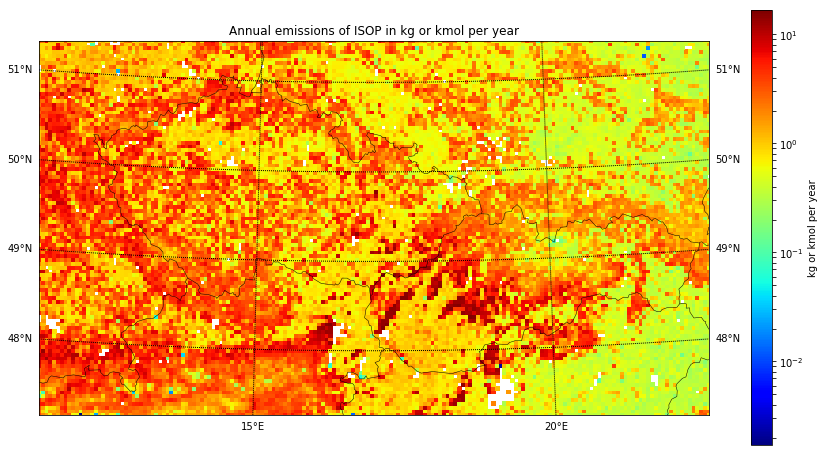

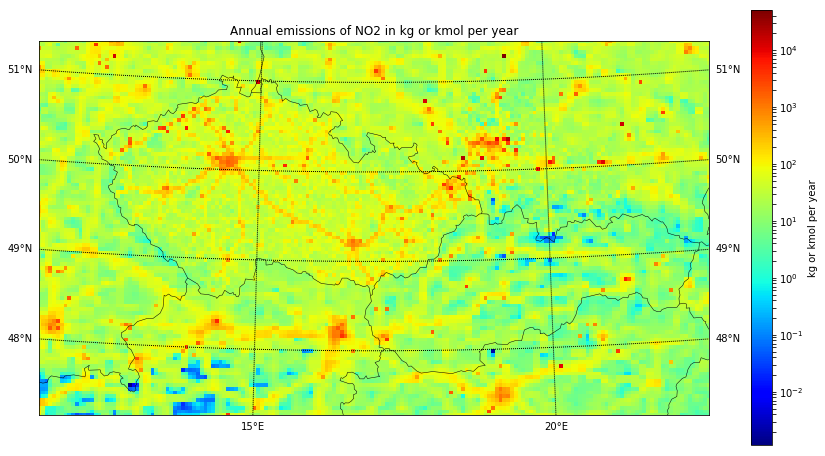

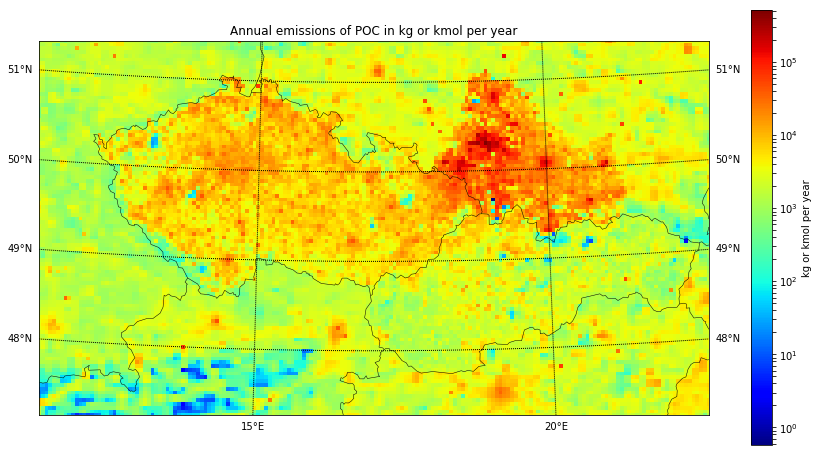

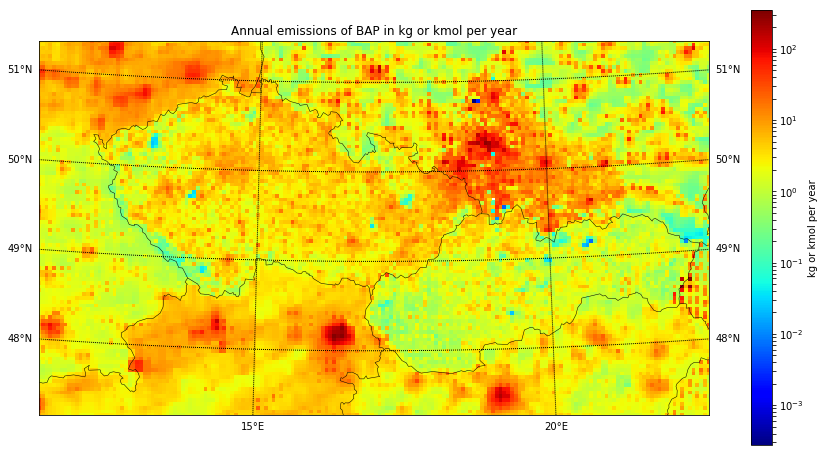

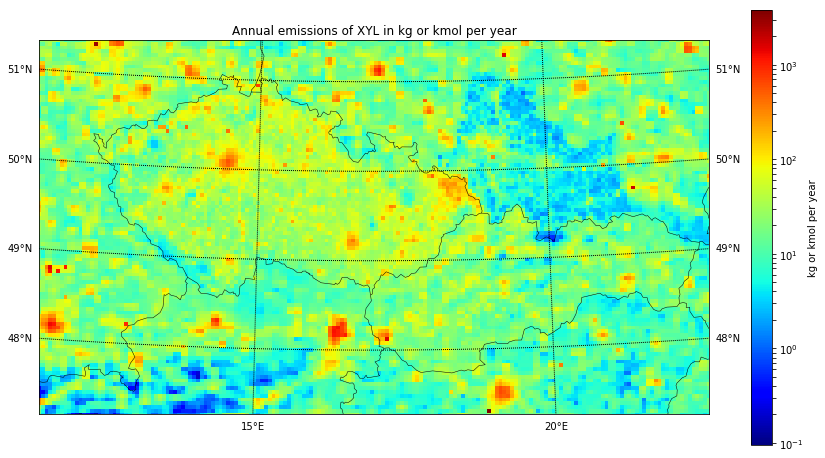

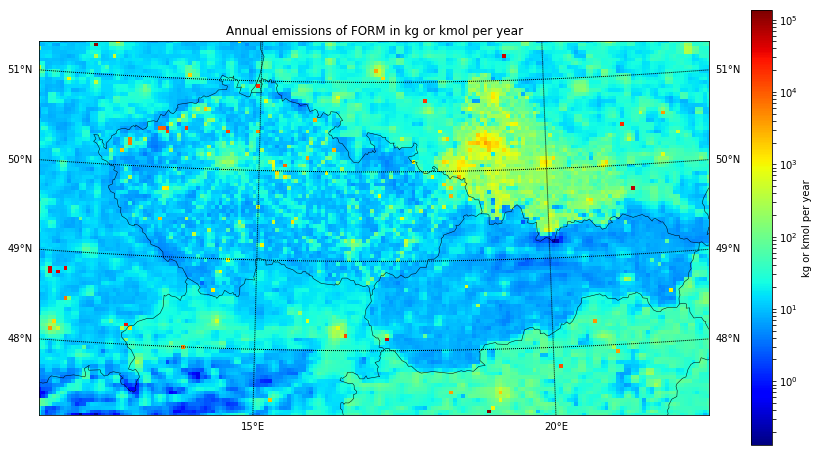

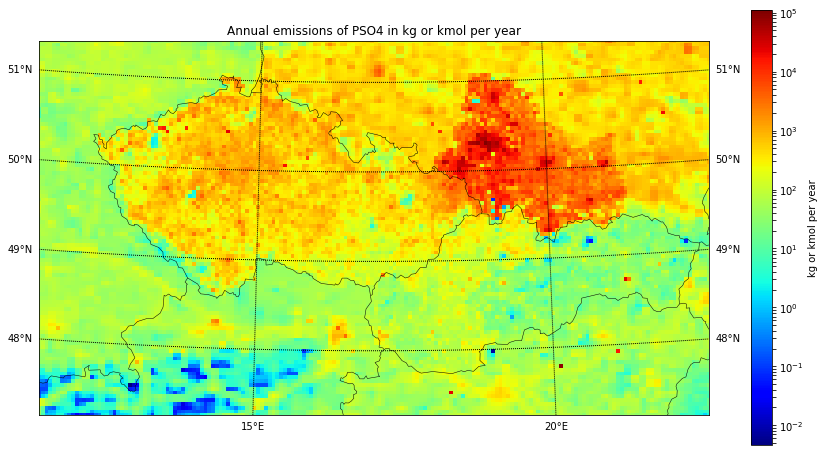

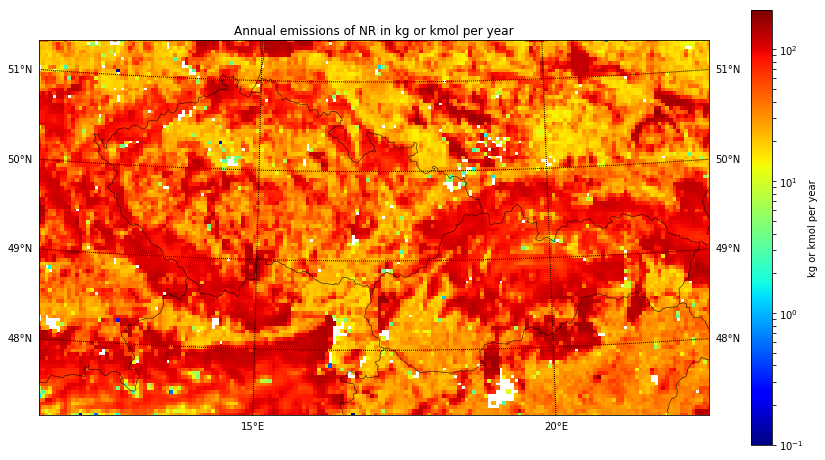

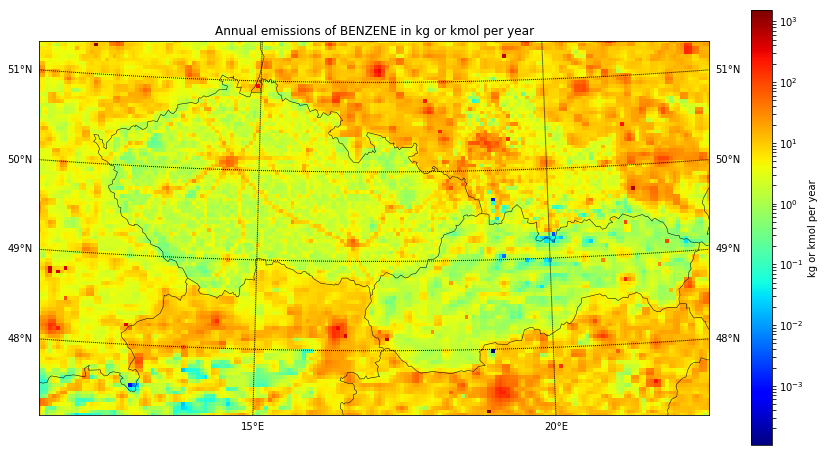

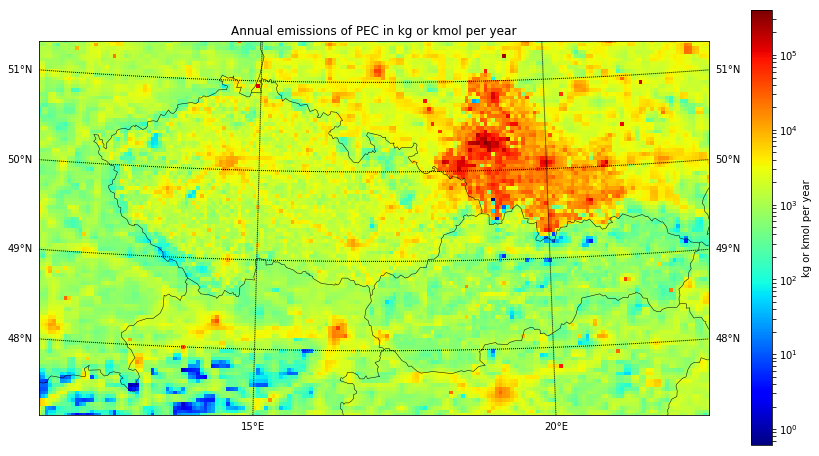

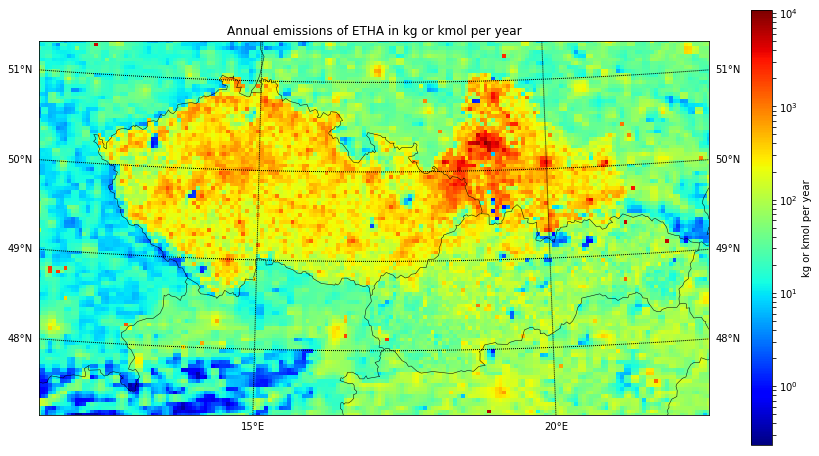

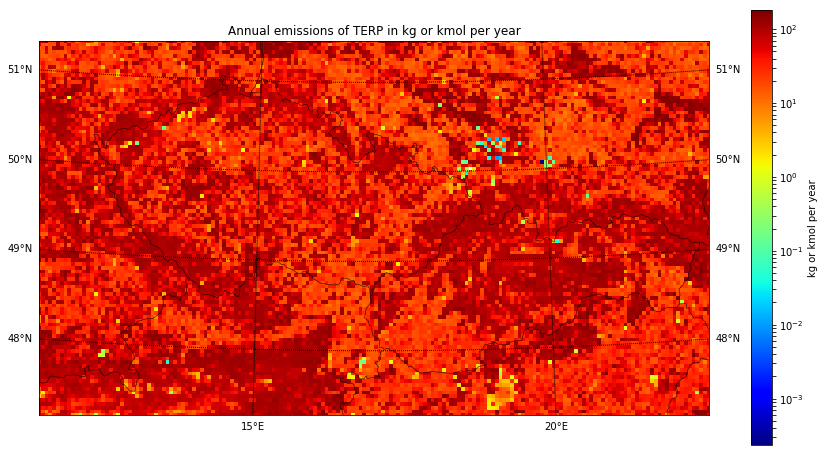

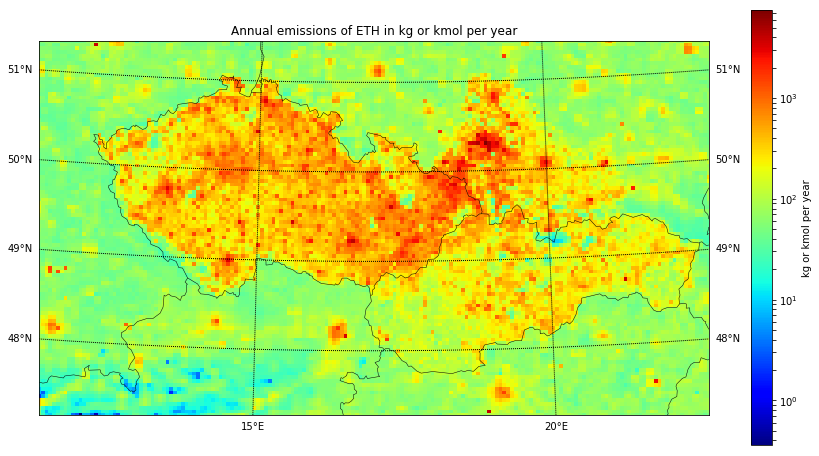

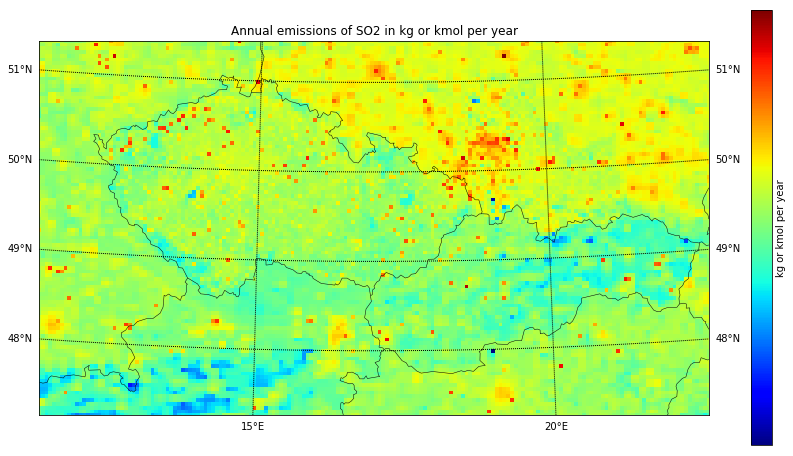

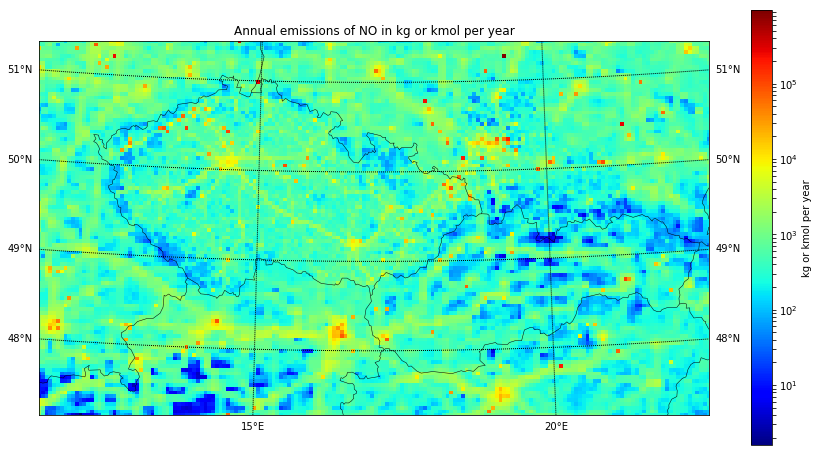

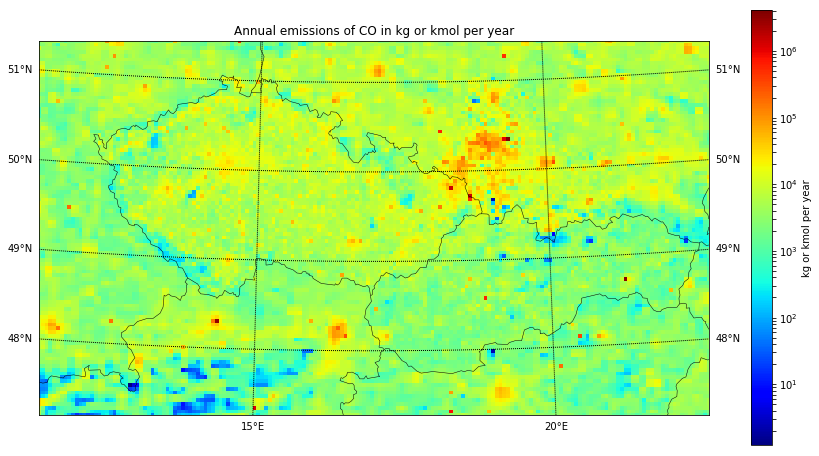

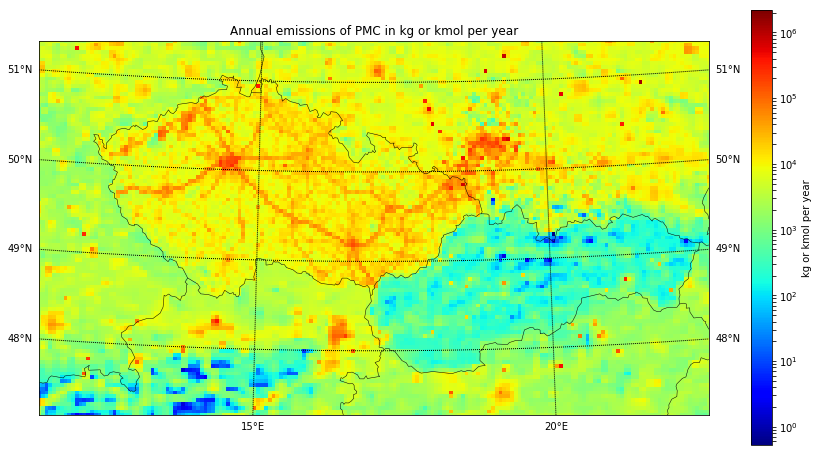

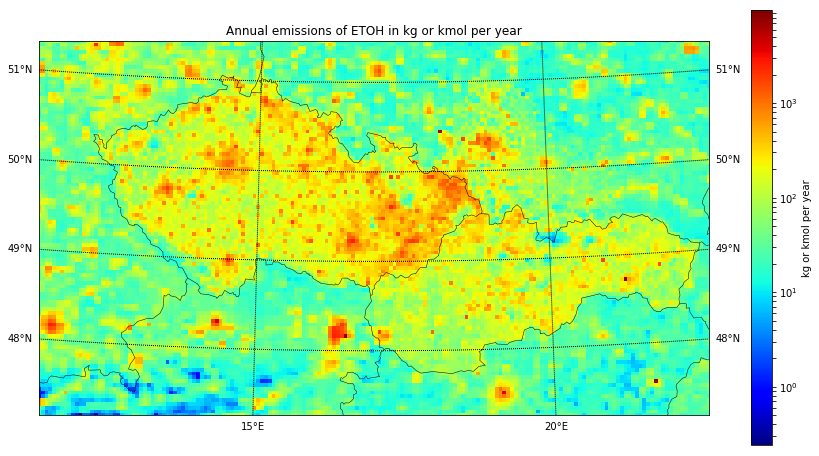

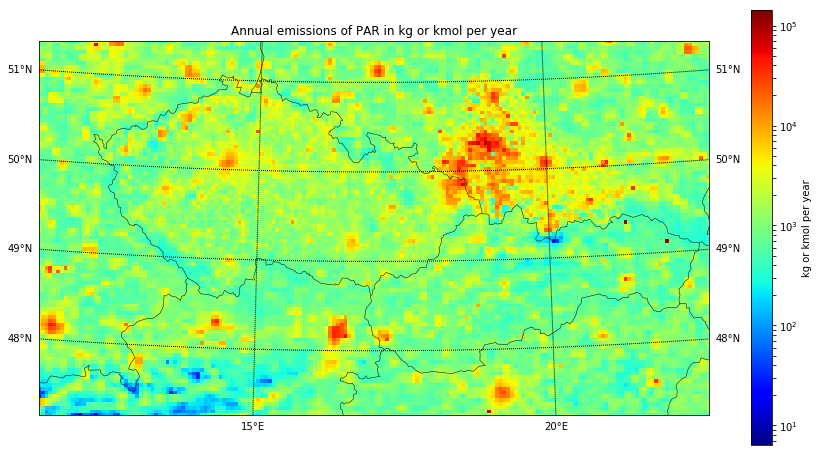

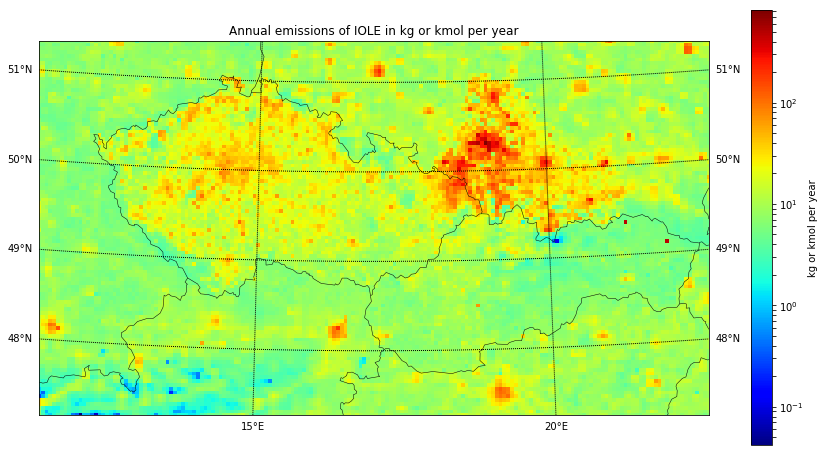

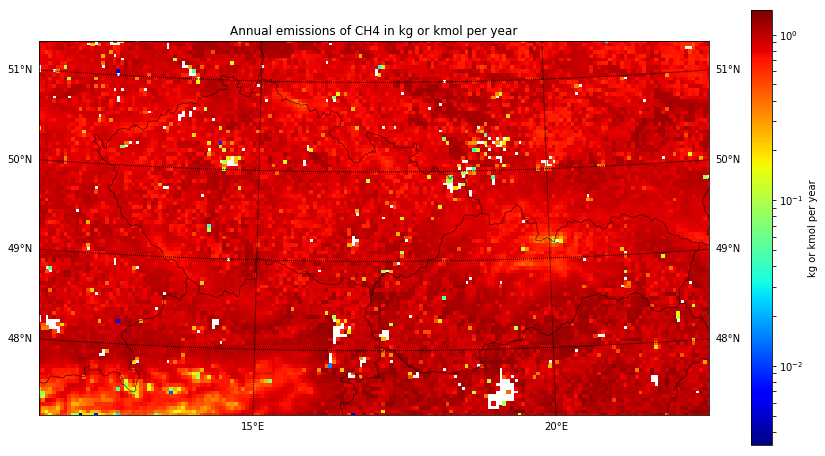

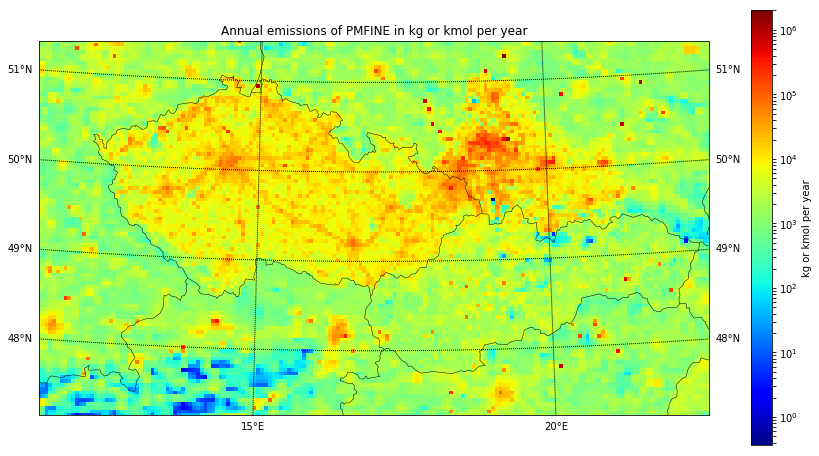

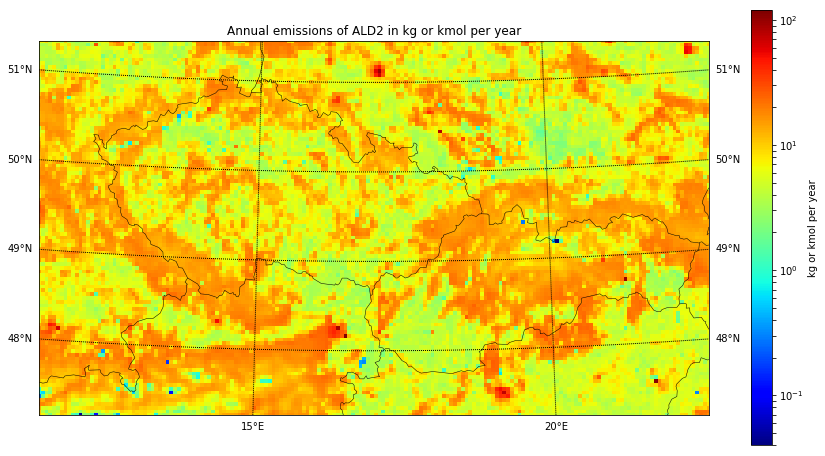

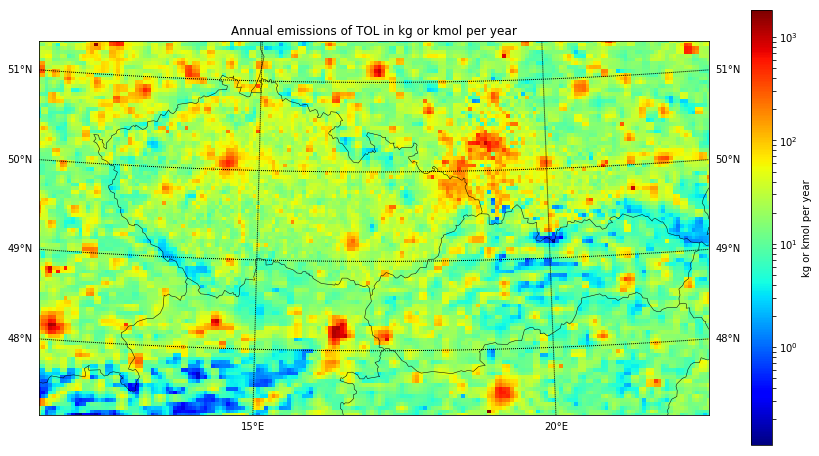

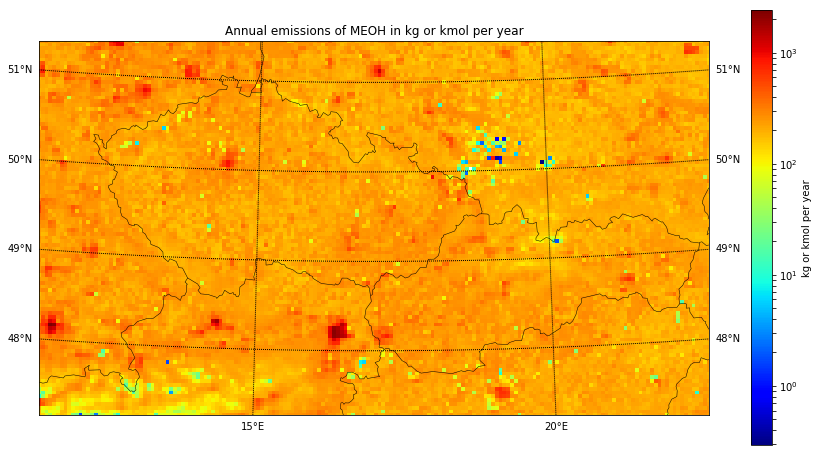

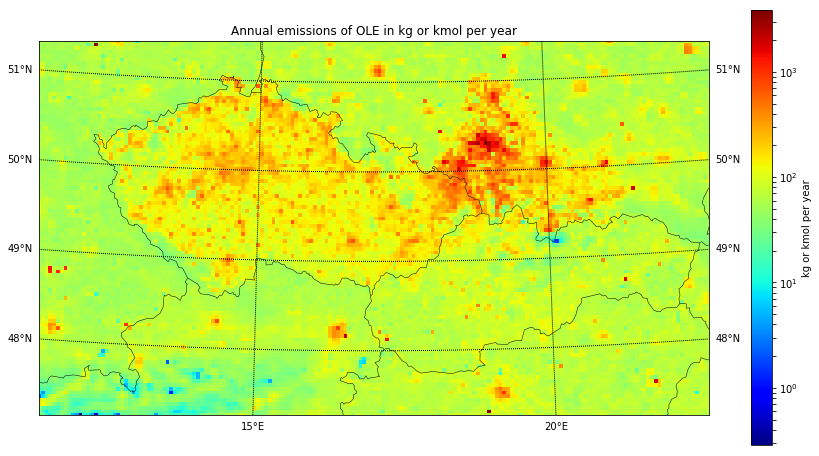

In [11]:
meridians = np.arange(10.,35.,5.)
pararels = np.arange(45.,52.,1.)


for i in dic_ann.keys():
    mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833780,height=466351,resolution='i')
    mapb.drawcountries()
    mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
    mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])
    
    # choose one of the two style of the plot
    mapb.pcolormesh(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
    #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

    plt.colorbar(label='kg or kmol per year')
    plt.title('Annual emissions of {0} in kg or kmol per year'.format(i))
    plt.show()
    plt.close()